In [1]:
#include<cmath>
//#include "Math/Polynomial.h"
#include "Math/Interpolator.h"
#include <iostream>
#include "TCanvas.h"
#include "TGraph.h"

In [2]:
gROOT->ProcessLine(".x CVSReader.C");

(int) 0


In [3]:
//Xs fb
Double_t Xs[]= {751.3, 633.5, 540.3, 460.3, 398.0, 343.3, 300.1, 262.3, 231.9, 203.9, 181.0, 161.1, 144.1, 128.9, 115.6, 103.8, 93.82, 84.97, 77.13};
Double_t MF[]= {100  , 105  , 110  , 115  , 120  , 125  , 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190};

In [4]:
// You can choose among the following methods:
// kLINEAR, kPOLYNOMIAL, kCSPLINE, kCSPLINE_PERIODIC, kAKIMA, kAKIMA_PERIODIC 
const Int_t ni = 19;//size of the arrays
ROOT::Math::Interpolator XS(ni, ROOT::Math::Interpolation::kLINEAR);
XS.SetData(ni, MF, Xs);

In [5]:
//Sanity check
//Double_t yi[ni];
//for ( Int_t i = 0; i < ni; ++i ){yi[i] = XS.Eval(MF[i]);}
//yi

In [6]:
Double_t Lumi(Double_t Z,Double_t XCSignal,Double_t EffSignal,std::vector<Double_t> XCBG,std::vector<Double_t> EffBG){
  
    if(XCBG.size() != EffBG.size()){
        std::cout<<  "ERROR: XCBG and EffBG should be same size" << std::endl;
        return 0;
    }
    Double_t TotalBG = 0;
    for (Int_t i=0;i<XCBG.size();i++){
        TotalBG += XCBG[i]*EffBG[i]*1000;//pb to fb
        //std::cout<< "XC: " <<XCBG[i] <<" , Eff: "<< EffBG[i]<< std::endl;
    }
    Double_t Numerator = ((EffSignal*XCSignal*1000)+TotalBG)*Z*Z;
    Double_t Denominator = (EffSignal*XCSignal*1000)*(EffSignal*XCSignal*1000);
    
    Double_t Lum = Numerator/Denominator;
    return Lum;
}


xs_80, xs_100, xs_105, xs_110, xs_115, xs_120, xs_125, xs_130, xs_135, xs_140, xs_145, xs_150, xs_155, xs_160, xs_165, xs_170, xs_175, xs_180, xs_185, xs_190, xs_195, xs_200
669.8 , 331.5, 284.8, 246.8, 214.2, 187.2, 164.6, 145.4, 128.9, 114.7, 102.2, 91.6, 82.3, 74.2, 67.0, 60.7, 55.1, 50.1, 45.8, 41.8, 38.3, 35.1

In [7]:
std::vector<Double_t> _XCBG;
std::vector<Double_t> _EffBG;
_XCBG.push_back(5.6997800);//all
_EffBG.push_back(1);

In [8]:
// Creating an object of CSVWriter
CSVReader reader("EffVLF_BRmu25_BRtau75.csv");

In [9]:
// Get the data from CSV File
std::vector<std::vector<std::string> > dataList = reader.getData();

In [10]:
TCanvas *c1 = new TCanvas("c1","A Simple Graph Example",200,10,700,500);

In [11]:
Double_t MinY = 2;
Double_t MinX = 100;
Double_t MaxY = 21;
Double_t MaxX = 170;

In [12]:
gStyle->SetOptStat(0);
//TH2D *h1 = new TH2D("h1","h1",19,MinX,MaxX,14,MinY,MaxY);
TH2D *h1 = new TH2D("h1","h1",14,MinX,MaxX,19,MinY,MaxY);
std::vector<Double_t> FistRow;
std::vector<Double_t> FistCol;
int count1 = 0;

In [13]:
auto Frame = c1->DrawFrame(MinX,MinY,MaxX,MaxY);
c1->SetRightMargin(0.15);
 //gStyle->SetPalette(55);
gStyle->SetPalette(87);

In [14]:
Frame->GetXaxis()->SetTitle("m_{F} [GeV]");
Frame->GetYaxis()->SetTitle("#DeltaM(F,DM) [GeV]");
Frame->GetYaxis()->CenterTitle("True");
Frame->GetYaxis()->SetTitleFont(42);
Frame->GetXaxis()->SetTitleFont(42);
Frame->GetYaxis()->SetTitleSize(0.04);
Frame->GetXaxis()->SetTitleSize(0.04);

In [15]:
//TLatex *   tex = new TLatex(0.85,0.91,"BR(F#rightarrow #mu,#tau)= 25%,75%; 3#sigma (13 TeV, 0 PU)");
TLatex *   tex = new TLatex(0.85,0.91,"BR(F#rightarrow #mu)= 25%, BR(F#rightarrow #tau)= 75%; 3#sigma, 13 TeV");
tex->SetNDC();
tex->SetTextAlign(31);
tex->SetTextFont(42);
tex->SetTextSize(0.04);
tex->SetLineWidth(2);
tex->Draw("Same");

In [16]:
TLatex *   tex1 = new TLatex(0.97,0.7,"Luminosity [1000 fb^{-1}]");
tex1->SetNDC();
tex1->SetTextAlign(31);
tex1->SetTextFont(42);
tex1->SetTextSize(0.04);
tex1->SetLineWidth(2);
tex1->SetTextAngle(90);
//tex1->Draw("Same");

In [17]:
//gStyle->SetPaintTextFormat("4.1f m");
gStyle->SetPaintTextFormat("1.2f");

In [18]:
Bool_t debug = kFALSE;  //kTRUE

In [19]:
// Print the content of row by row on screen
count1 = 0; 
for(std::vector<std::string> vec : dataList){
    int count2 = 0;
    for(std::string Data : vec){
        Double_t data = atof(Data.c_str());
        if (count1 == 0){
            FistRow.push_back(data);
        }else{
            if (count2 == 0){
                FistCol.push_back(data);
            }else{
                if(data != 0){//To be sure dont use the 0s
                    // Z/31.63 Para que Lumi=lumi/1000
                    /*
                    3sigma = 0.0948466646
                    5sigma = 0.1580777743                
                    */
                    Double_t Lum = Lumi(0.0948466646,XS.Eval((Double_t)FistRow[count2])*0.001,data,_XCBG,_EffBG);
                    //h1->Fill(FistCol.back(),FistRow[count2],Lum);
                    h1->Fill(FistRow[count2],FistCol.back(),Lum);
                    if(debug){
                        std::cout<<"XS: "<<XS.Eval(FistRow[count2])*0.001,4;
                        std::cout<<" (" << FistCol.back() << ","; 
                        std::cout<<FistRow[count2] << ",";
                        std::cout<<data << ") , ";
                    }
                    }else{
                        //Deberia extrapolar entre los que o tengo
                    }
                }
            
        }
        count2++;
    }
    count1++;
    if(debug){
        std::cout<<std::endl;
        std::cout<<std::endl;
    }
}    

In [20]:
//double contours[1];
//contours[0] = 3;
//contours[1] = 5;
//contours[2] = 0.01;
//contours[3] = 0.001;

h1->DrawCopy("colz same");
h1->DrawCopy("TEXT same");
//h1->DrawCopy("TEXTE0 same");
//h1->SetContour(1,contours);
//h1->Draw("cont2 same");
//h1->SetLineColor(kRed);
tex1->Draw("Same");

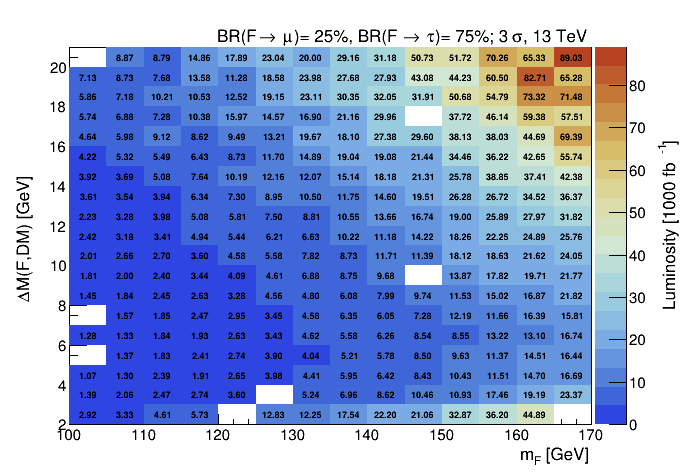

In [21]:
c1->Draw()

In [22]:
string Name = "";
string NameC = "";
string NamePDF = "";

In [23]:
Name = "LumiToExclusionSigma3_BRmu25tau75";
NameC = Name+".C";
NamePDF = Name+".pdf";
//c1->SaveSource(NameC.c_str());
c1->SaveAs(NamePDF.c_str(),"pdf");

Info in <TCanvas::Print>: pdf file LumiToExclusionSigma3_BRmu25tau75.pdf has been created
